In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import matplotlib.pyplot as plt

In [2]:
#load the data set
data=pd.read_csv('CarPrice_Assignment.csv')
print(data.head())
print(data.info())

   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

In [3]:
#data preprocessing,dropping the unnecessary coloumn and handling the catergorical variables
data=data.drop(['CarName','car_ID'],axis=1)
data = pd.get_dummies(data, drop_first=True)


In [4]:
#splitting the data 

X=data.drop('price', axis=1)
Y=data['price']

In [6]:
scaler = StandardScaler()
X=scaler.fit_transform(X)
Y=scaler.fit_transform(np.array(Y).reshape(-1, 1))


In [7]:
#splitting the dataset into training and tests

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [9]:
#create sdg regressor model
sgd_model= SGDRegressor(max_iter=1000, tol=1e-3)

In [10]:
#fiting the model to training data

sgd_model.fit(X_train, Y_train)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor()

In [11]:
#making predictions
y_pred = sgd_model.predict(X_test)

In [13]:
#evaluating model performance
mse = mean_squared_error(Y_test, y_pred)
r2=r2_score(Y_test,y_pred)
mae= mean_absolute_error(Y_test, y_pred)

In [15]:
#print evaluation metrics
print('Name:Rosetta Jenifer C')
print('Reg no: 212225230230')
print("Mean Squared Error:",mse)
print("Mean Absolute Error:",mae)
print("R-Squared Score:",r2)

Name:Rosetta Jenifer C
Reg no: 212225230230
Mean Squared Error: 0.20551015864536643
Mean Absolute Error: 0.30796326812227115
R-Squared Score: 0.8346671525657238


In [17]:
#print model coefficients
print("\nModel Coefficients:")
print("Coefficients:",sgd_model.coef_)
print("Intercept:",sgd_model.intercept_)


Model Coefficients:
Coefficients: [ 0.04168628  0.12085741 -0.00511029  0.18193152  0.019827    0.18158423
  0.32262535 -0.03784258 -0.08985381 -0.00427598  0.10017788  0.04054518
 -0.03362866 -0.04739726 -0.02143664  0.02432868  0.01388736 -0.03520375
 -0.0960592  -0.0185273  -0.09508357 -0.03394751  0.06396781  0.22177495
  0.00734633 -0.10757003  0.07670212 -0.01508162 -0.00867895  0.01111341
 -0.05670237 -0.16118021 -0.10265586  0.00098069 -0.03980517  0.01111341
 -0.00566757 -0.01987189  0.02143664 -0.0195482  -0.04161632 -0.04538116
 -0.01751983]
Intercept: [-0.01401093]


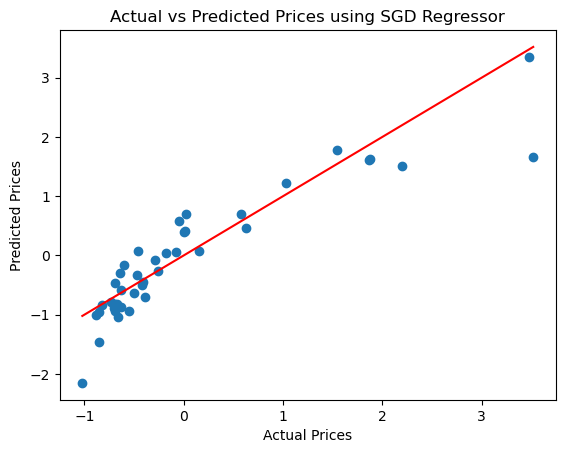

In [18]:
#visualising actual vs predicted prices
plt.scatter(Y_test,y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices using SGD Regressor")
plt.plot([min(Y_test),max(Y_test)],[min(Y_test),max(Y_test)],color='red')
plt.show()